## 互评作业一：数据探索性分析与数据预处理


### 1.1 数据可视化和摘要
- 数据摘要：
  - 标称属性给出聚会频数
  - 数值属性给出五数概括以及缺失值个数
- 数据可视化：
  使用直方图和盒图检查数据分布以及离群点

对于第一个数据集：Oakland Crime Statistics 2011 to 2016 数据集，共有这些属性：'Agency' 'Create Time' 'Location' 'Area Id' 'Beat' 'Priority''Incident Type Id' 'Incident Type Description' 'Event Number''Closed Time'，其中Agency是数据收集来源单位，在这里所有的来源都是OP，Location 和 Area Id 数据是相关的（location对应唯一的areaid），Incident Type Id和Incident Type Description是一一对应的，除去agency所有值唯一不考虑，数值属性以及标称属性有：
- 数值属性：Create Time 和 Closed Time
- 标称属性： Location(Area Id), Beat, Priority, Incident Type Id(Incident Type Decription)， Event Number
这里使用的是 records_for_2011.csv中的数据

In [2]:
import pandas as pd
from collections import Counter
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

class data_process():
    """
    统计数据不同属性的频数以及计算五数概括以及绘制box-plot和histogram-plot
    """
    def __init__(self, filename):
        self.data = pd.read_csv(filename)
        self.columns_name = self.data.columns.values
        self.agency_data = self.data['Agency']
        self.create_time_data = self.data['Create Time']
        self.location_data = self.data['Location']
        self.area_id_data = self.data['Area Id']
        self.beat_data = self.data['Beat']
        self.priority_data = self.data['Priority']
        self.incident_id_data = self.data['Incident Type Id']
        self.incident_type_description_data = self.data['Incident Type Description']
        self.event_number_data = self.data['Event Number']
        self.closed_time_data = self.data['Closed Time']

    def print_data_count(self):
        """
        统计，打印不同属性的最大频数
        """
        print("Location & Area Id:", Counter(self.location_data).most_common(1))
        print("Beat:", Counter(self.beat_data).most_common(1))
        print("Priority:", Counter(self.priority_data).most_common(1))
        print("Incident Type & Incident Type Description:", Counter(self.incident_id_data).most_common(1))
        
    def print_five_number_summary(self):
        """
        对于于数据中的时间 这里保留的是精确到天的数据 没有使用具体时分秒的数据
        由于这是时间数据，没有找到直接比较大小之类的方法 所以我在这里取定一个时间点
        将其他的日期数据转化为距离这个时间的天数 这样方便比较大小以及得到分位数等信息
        """
        self.create_time_data = [str(string).split('T')[0] for string in self.create_time_data]
        self.create_time_data = pd.to_datetime(self.create_time_data)
        start = pd.datetime(2010, 1, 1)
        self.days_data = [(time - start).days for time in self.create_time_data][:-1]
        self.sorted_days_data = sorted(self.days_data)
#         self.create_time_data = pd.to_datetime(self.create_time_data)
#         print(self.create_time_data[0])
#         print(type(self.create_time_data[0]))

        # 排序后计算最大最小以及四分位数等五数概括数据
        total = len(self.sorted_days_data)
        min_data = self.sorted_days_data[0]
        max_data = self.sorted_days_data[total - 2]
        Q1 = self.sorted_days_data[int(total/4)]
        mid = self.sorted_days_data[int(total/2)]
        Q3 = self.sorted_days_data[int(3*total/4)]
        print("Min: ", start + timedelta(min_data))
        print("Q1: ", start + timedelta(Q1))
        print("mid: ", start + timedelta(mid))
        print("Q3: ", start + timedelta(Q3))
        print("Max: ",start + timedelta(max_data))
        
    def box_plot(self):
        """
        绘制 box-plot
        """
        plt.boxplot(self.days_data)
        plt.show()
        
    def hist_plot(self):
        """
        绘制 histogram-plot
        """
#         cou = dict(Counter(self.days_data))
        groups = [365, 365+30, 365+30*2, 365+30*3, 365+30*4, 365+30*5, 365+30*6, 365+30*7, 365+30*8, 365+30*9, 365+30*10, 365+30*11, 365+30*12, 365+30*13]
        plt.hist(self.days_data, groups, histtype='bar', rwidth=0.8)
        plt.show()
        
    def nan_count(self):
        """
        统计某一种属性有多少空值 这里针对数值属性中的 create time进行统计（其他事标称属性）
        """
        nan_cou = self.create_time_data().isnull().sum()
        print("Create_time None value count: ", res)
     

In [10]:
filename1 = "oakland_crimes/records-for-2011.csv"
data_obj1 = data_process(filename1)
# 标称属性的频数统计
data_obj1.print_data_count()

Location & Area Id: [(' INTERNATIONAL BLVD ', 3866)]
Beat: [('04X', 7410)]
Priority: [(2.0, 143314)]
Incident Type & Incident Type Description: [('933R', 17348)]


In [11]:
# 数值属性 create time 的五数概括
data_obj1.print_five_number_summary()

Min:  2011-01-01 00:00:00
Q1:  2011-04-05 00:00:00
mid:  2011-07-03 00:00:00
Q3:  2011-09-28 00:00:00
Max:  2011-12-31 00:00:00


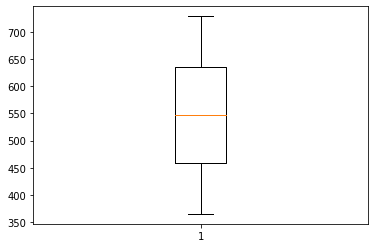

In [50]:
# box plot 结果 这个数据集的数值属性只有两个日期数据，这里只是对 create_time 进行绘图
data_obj1.box_plot()

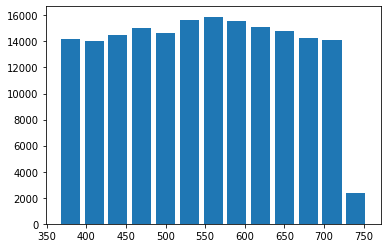

In [51]:
#直方图结果
data_obj1.hist_plot()

对于第二个数据集：Consumer & Visitor Insights For Neighborhoods 数据集
- 标称属性： related_same_month_brand, top_brand,
- 数值属性：raw_visit_count, raw_visitor_count, distance_from_home, census_block_group,date_range_start,data_range_end等

In [90]:
import pandas as pd
from collections import Counter
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

class data_process():
    """
    与上个数据集的处理基本一致
    """
    def __init__(self, filename):
        self.data = pd.read_csv(filename)
        self.columns_name = self.data.columns.values
        self.sensus_block_group_data = self.data['census_block_group']
        self.data_range_start__data = self.data['date_range_start']
        self.data_range_end_data = self.data['date_range_end']
        self.raw_visit_count_data = self.data['raw_visit_count']
        self.raw_visitor_count_data = self.data['raw_visitor_count']
        self.visitor_home_cbgs_data = self.data['visitor_home_cbgs']
        self.isitor_work_cbgs_data = self.data['visitor_work_cbgs']
        self.distance_from_home_data = self.data['distance_from_home']
        self.related_same_day_brand_data = self.data['related_same_day_brand']
        self.related_same_month_brand_data = self.data['related_same_month_brand']
        self.top_brands_data = self.data['top_brands']
        self.popularity_by_hour_data = self.data['popularity_by_hour']
        self.popularity_by_day_data = self.data['popularity_by_day']
        

    def print_data_count(self):
        print("sensus_block_group: ", Counter(self.sensus_block_group_data).most_common(1))
        print("Raw visit count: ", Counter(self.raw_visit_count_data).most_common(1))
        print("Raw visitor count: ", Counter(self.raw_visitor_count_data).most_common(1))
        
    def print_five_number_summary(self):
        print("For raw visit count:")
        self.raw_visit_count_data = self.raw_visit_count_data.fillna(100)
        total = len(self.raw_visit_count_data)
        self.sorted_visit_data = sorted(self.raw_visit_count_data)
        min_data = self.sorted_visit_data[0]
        max_data = self.sorted_visit_data[total - 1]
        Q1 = self.sorted_visit_data[int(total/4)]
        mid = self.sorted_visit_data[int(total/2)]
        Q3 = self.sorted_visit_data[int(3*total/4)]
        print("Min: ", min_data)
        print("Q1: ", Q1)
        print("mid: ", mid)
        print("Q3: ", Q3)
        print("Max: ",max_data)
        print("For raw visitor count:")
        self.raw_visitor_count_data = self.raw_visitor_count_data.fillna(100)
        total = len(self.raw_visitor_count_data)
        self.sorted_visitor_data = sorted(self.raw_visitor_count_data)
        min_data = self.sorted_visitor_data[0]
        max_data = self.sorted_visitor_data[total - 1]
        Q1 = self.sorted_visitor_data[int(total/4)]
        mid = self.sorted_visitor_data[int(total/2)]
        Q3 = self.sorted_visitor_data[int(3*total/4)]
        print("Min: ", min_data)
        print("Q1: ", Q1)
        print("mid: ", mid)
        print("Q3: ", Q3)
        print("Max: ",max_data)
        
    def box_plot_raw_visit(self):
        plt.boxplot(self.raw_visit_count_data)
        plt.show()
        
    def box_plot_raw_visitor(self):
        plt.boxplot(self.raw_visitor_count_data)
        plt.show()
        
    def hist_plot_raw_visit(self):
#         cou = dict(Counter(self.days_data))
        groups = [10000, 20000, 30000, 40000, 50000, 60000, 70000,  80000, 90000, 100000]
        plt.hist(self.raw_visit_count_data, groups, histtype='bar', rwidth=0.8)
        plt.show()
        
    def hist_plot_raw_visitor(self):
#         cou = dict(Counter(self.days_data))
        groups = [10000, 20000, 30000, 40000, 50000, 60000, 70000,  80000, 90000, 100000]
        plt.hist(self.raw_visitor_count_data, groups, histtype='bar', rwidth=0.8)
        plt.show()

In [91]:
filename2 = "visit/cbg_patterns.csv"
data_visit = data_process(filename2)
data_visit.print_data_count()

sensus_block_group:  [(10059508001.0, 1)]
Raw visit count:  [(24531.0, 15)]
Raw visitor count:  [(2292.0, 39)]


In [80]:
data_visit.print_five_number_summary()

For raw visit count:
Min:  60.0
Q1:  17027.0
mid:  30625.0
Q3:  56652.0
Max:  7179900.0
For raw visitor count:
Min:  50.0
Q1:  3426.0
mid:  6536.0
Q3:  13092.0
Max:  6113949.0


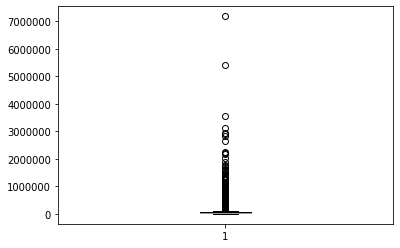

In [81]:
# 这里计算使用的属性是 raw_visit_count 以及 raw_visitor_count（数值属性实在是太多了。。。）
data_visit.box_plot_raw_visit()

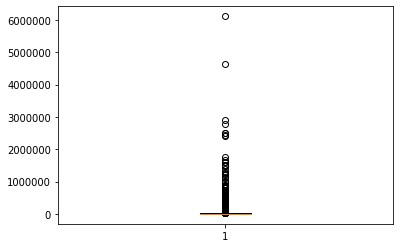

In [82]:
data_visit.box_plot_raw_visitor()

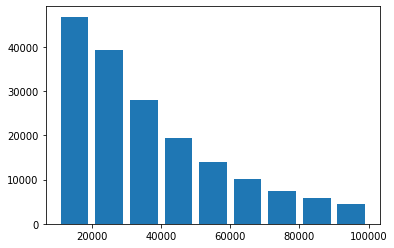

In [88]:
data_visit.hist_plot_raw_visit()

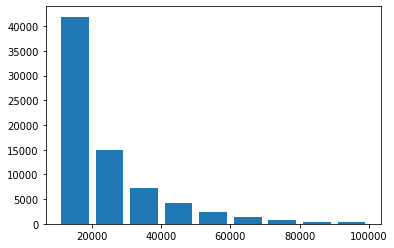

In [92]:
data_visit.hist_plot_raw_visitor()

### 1.2 数据缺失的处理
观察数据的缺失情况，分析缺失的原因，并使用四种方法处理缺失数据：
- 将缺失数据剔除
- 使用最高频率值填补缺失数据
- 通过属性的相关关系填补缺失数据
- 通过数据对象的属性相似性来填补缺失值

可视化对比填补前后的数据

通过属性的相关关系以及属性相似性填补的方法没有找到资料 所以没有给出方法
对于第一个数据集的处理：

In [43]:
class Process_missing_data:
    """
    用于处理缺失数据
    """
    def __init__(self, filename):
        self.data = pd.read_csv(filename)
        self.columns_name = self.data.columns.values
        self.agency_data = self.data['Agency']
        self.create_time_data = self.data['Create Time']
        self.location_data = self.data['Location']
        self.area_id_data = self.data['Area Id']
        self.beat_data = self.data['Beat']
        self.priority_data = self.data['Priority']
        self.incident_id_data = self.data['Incident Type Id']
        self.incident_type_description_data = self.data['Incident Type Description']
        self.event_number_data = self.data['Event Number']
        self.closed_time_data = self.data['Closed Time']
        
    def print_attr(self):
        print(self.columns_name)
        
    def check_missing_data(self):
        """
        检查哪些属性下的数据又缺失值
        """
#       isnull().value_counts()
        print("Check for missing data in attributes:")
        temp_res = self.agency_data.isnull()
        print('Agency: ', 'Exist' if True in set(temp_res) else 'Not exist')
        temp_res = self.create_time_data.isnull()
        print('Create Time Data: ', 'Exist' if True in set(temp_res) else 'Not exist')
        temp_res = self.location_data.isnull()
        print('Location: ', 'Exist' if True in set(temp_res) else 'Not exist')
        temp_res = self.beat_data.isnull()
        print('Beat: ', 'Exist' if True in set(temp_res) else 'Not exist')
        temp_res = self.priority_data.isnull()
        print('Priority: ', 'Exist' if True in set(temp_res) else 'Not exist')
        temp_res = self.incident_id_data.isnull()
        print('Incident id: ', 'Exist' if True in set(temp_res) else 'Not exist')
        temp_res = self.closed_time_data.isnull()
        print('Closed time data: ', 'Exist' if True in set(temp_res) else 'Not exist')
        
    def data_completion_delete(self):
        """
        直接删除缺失数据
        """
        self.agency_data = self.agency_data.dropna()
        self.create_time_data = self.create_time_data.dropna()
#         print(self.create_time_data.isnull().value_counts())
        self.beat_data = self.beat_data.dropna()
        self.priority_data = self.priority_data.dropna()
        self.incident_id_data = self.incident_id_data.dropna()
        self.closed_time_data = self.closed_time_data.dropna()
        print("Completion by deleting Nan value end.")
        
    def data_completion_common_freq(self):
        """
        使用属性最大频数的数值来填充
        """
        self.agency_data = self.agency_data.fillna('OP')
        self.create_time_data = self.create_time_data.fillna(list(dict(Counter(self.create_time_data).most_common(1)).keys())[0])
        self.beat_data = self.beat_data.fillna(list(dict(Counter(self.beat_data).most_common(1)).keys())[0])
        self.priority_data = self.priority_data.fillna(list(dict(Counter(self.priority_data).most_common(1)).keys())[0])
        self.incident_id_data = self.incident_id_data.fillna(list(dict(Counter(self.incident_id_data).most_common(1)).keys())[0])
        self.closed_time_data = self.closed_time_data.fillna(list(dict(Counter(self.closed_time_data).most_common(1)).keys())[0])
        print("Completion by the most highest frequency value end.")
        
    def data_completion_relation(self):
        return False
    
    def data_completion_similarity(self):
        return False
    
#   这里数据可视化了两个属性 beat 和 priority 的频数统计图
    def plot_beat(self):
        plt.figure(figsize=(15, 5))
        res = dict(Counter(self.beat_data))
        print(len(res))
        res_date = list(res.keys())[::]
        res_count = list(res.values())[::]
        plt.bar(res_date, res_count)
        plt.xticks(rotation=45)
        plt.show() 
    def plot_priority(self):
        res = dict(Counter(self.priority_data))
        print(len(res))
        res_date = list(res.keys())[::]
        res_count = list(res.values())[::]
        plt.bar(res_date, res_count)
        plt.xticks(rotation=45)
        plt.show() 
        

In [44]:
filename1 = "oakland_crimes/records-for-2011.csv"
data_2011 = Process_missing_data(filename1)
# 检查不同属性的缺失值存在情况
data_2011.check_missing_data()

Check for missing data in attributes:
Agency:  Exist
Create Time Data:  Exist
Location:  Not exist
Beat:  Exist
Priority:  Exist
Incident id:  Exist
Closed time data:  Exist


In [45]:
data_2011.data_completion_delete()

Completion by deleting Nan value end.


58


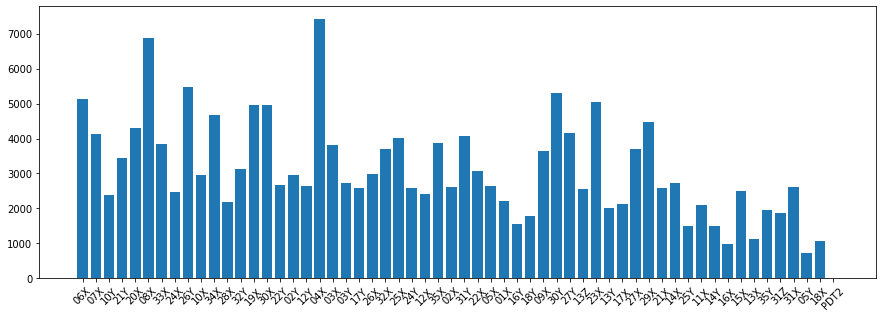

In [46]:
data_2011.plot_beat()

In [36]:
data_2011.data_completion_common_freq()

Completion by the most highest frequency value end.


3


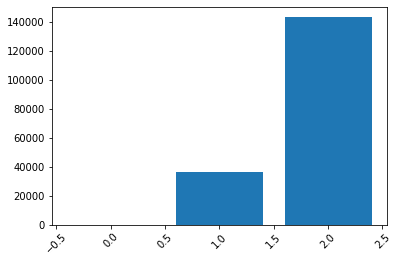

In [38]:
data_2011.plot_priority()

第二个数据集的缺失值处理

In [3]:
class data_missing_process():
    """
    第二个数据集的处理方法 与之前类似
    """
    def __init__(self, filename):
        self.data = pd.read_csv(filename)
        self.columns_name = self.data.columns.values
        self.sensus_block_group_data = self.data['census_block_group']
        self.data_range_start_data = self.data['date_range_start']
        self.data_range_end_data = self.data['date_range_end']
        self.raw_visit_count_data = self.data['raw_visit_count']
        self.raw_visitor_count_data = self.data['raw_visitor_count']
        self.visitor_home_cbgs_data = self.data['visitor_home_cbgs']
        self.isitor_work_cbgs_data = self.data['visitor_work_cbgs']
        self.distance_from_home_data = self.data['distance_from_home']
        self.related_same_day_brand_data = self.data['related_same_day_brand']
        self.related_same_month_brand_data = self.data['related_same_month_brand']
        self.top_brands_data = self.data['top_brands']
        self.popularity_by_hour_data = self.data['popularity_by_hour']
        self.popularity_by_day_data = self.data['popularity_by_day']
        

    def check_missing_data(self):
#       isnull().value_counts()
        print("Check for missing data in attributes:")
        temp_res = self.sensus_block_group_data.isnull()
        print('Census Block Group: ', 'Exist' if True in set(temp_res) else 'Not exist')
        temp_res = self.data_range_start_data.isnull()
        print('Data Range Start: ', 'Exist' if True in set(temp_res) else 'Not exist')
        temp_res = self.data_range_end_data.isnull()
        print('Data Range End: ', 'Exist' if True in set(temp_res) else 'Not exist')
        temp_res = self.raw_visit_count_data.isnull()
        print('Raw Visit Count Data: ', 'Exist' if True in set(temp_res) else 'Not exist')
        temp_res = self.raw_visitor_count_data.isnull()
        print('Raw Visitor Count Data: ', 'Exist' if True in set(temp_res) else 'Not exist')
        temp_res = self.visitor_home_cbgs_data.isnull()
        print('Visitor Home cbgs Data: ', 'Exist' if True in set(temp_res) else 'Not exist')
        temp_res = self.distance_from_home_data.isnull()
        print('Distance from Home data: ', 'Exist' if True in set(temp_res) else 'Not exist')
        
    def data_completion_delete(self):
        self.raw_visit_count_data = self.raw_visit_count_data.dropna()
        self.raw_visitor_count_data = self.raw_visitor_count_data.dropna()
#         print(self.create_time_data.isnull().value_counts())
        self.data_range_start_data = self.data_range_start_data.dropna()
        self.data_range_end_data = self.data_range_end_data.dropna()
        self.distance_from_home_data = self.distance_from_home_data.dropna()
        self.visitor_home_cbgs_data = self.visitor_home_cbgs_data.dropna()
        print("Completion by deleting Nan value end.")
        
    def data_completion_common_freq(self):
        self.raw_visit_count_data = self.raw_visit_count_data.fillna(list(dict(Counter(self.raw_visit_count_data).most_common(1)).keys())[0])
        self.raw_visitor_count_data = self.raw_visitor_count_data.fillna(list(dict(Counter(self.raw_visitor_count_data).most_common(1)).keys())[0])
        self.data_range_start_data = self.data_range_start_data.fillna(list(dict(Counter(self.data_range_start_data).most_common(1)).keys())[0])
        self.data_range_end_data = self.data_range_end_data.fillna(list(dict(Counter(self.data_range_end_data).most_common(1)).keys())[0])
        self.distance_from_home_data = self.distance_from_home_data.fillna(list(dict(Counter(self.distance_from_home_data).most_common(1)).keys())[0])
        print("Completion by the most highest frequency value end.")
        
    def data_completion_relation(self):
        return False
    
    def data_completion_similarity(self):
        return False
        
    def hist_plot_raw_visit(self):
#         cou = dict(Counter(self.days_data))
        groups = [10000, 20000, 30000, 40000, 50000, 60000, 70000,  80000, 90000, 100000]
        plt.hist(self.raw_visit_count_data, groups, histtype='bar', rwidth=0.8)
        plt.show()
        
    def hist_plot_raw_visitor(self):
#         cou = dict(Counter(self.days_data))
        groups = [10000, 20000, 30000, 40000, 50000, 60000, 70000,  80000, 90000, 100000]
        plt.hist(self.raw_visitor_count_data, groups, histtype='bar', rwidth=0.8)
        plt.show()

In [4]:
filename = "visit/cbg_patterns.csv"
data_visit = data_missing_process(filename)
data_visit.check_missing_data()

Check for missing data in attributes:
Census Block Group:  Exist
Data Range Start:  Not exist
Data Range End:  Not exist
Raw Visit Count Data:  Exist
Raw Visitor Count Data:  Exist
Visitor Home cbgs Data:  Not exist
Distance from Home data:  Exist


In [6]:
data_visit.data_completion_delete()

Completion by deleting Nan value end.


In [7]:
data_visit.data_completion_common_freq()

Completion by the most highest frequency value end.


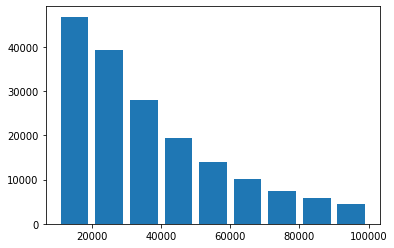

In [8]:
data_visit.hist_plot_raw_visit()

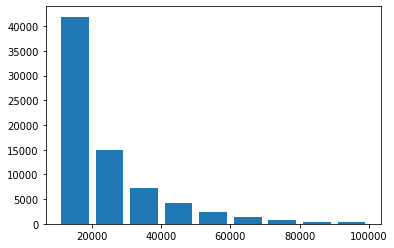

In [9]:
data_visit.hist_plot_raw_visitor()